In [282]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

#balancing data
from imblearn.over_sampling import RandomOverSampler
#modelpredicting
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import StandardScaler,MinMaxScaler
import shap

from lazypredict.Supervised import LazyClassifier
%matplotlib inline

In [283]:
df=pd.read_csv("Credit_card.csv")

In [284]:
target=pd.read_csv("Credit_card_label.csv")

In [285]:
df['label']=target['label']

In [286]:
data=df.copy()

In [287]:
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.00,Pensioner,Higher education,Married,House / apartment,-18772.00,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.00,Commercial associate,Higher education,Married,House / apartment,-13557.00,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.00,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.00,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.00,Commercial associate,Higher education,Married,House / apartment,-13557.00,-586,1,1,1,0,NaN,2,1


In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

In [289]:
df.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [290]:
df['Type_Occupation'].unique()

array([nan, 'Core staff', 'Cooking staff', 'Laborers', 'Sales staff',
       'Accountants', 'High skill tech staff', 'Managers',
       'Cleaning staff', 'Drivers', 'Low-skill Laborers', 'IT staff',
       'Waiters/barmen staff', 'Security staff', 'Medicine staff',
       'Private service staff', 'HR staff', 'Secretaries',
       'Realty agents'], dtype=object)

In [291]:
for i in df.columns:
    if df[i].dtype=='O':
        print(i,"==",df[i].unique())

GENDER == ['M' 'F' nan]
Car_Owner == ['Y' 'N']
Propert_Owner == ['Y' 'N']
Type_Income == ['Pensioner' 'Commercial associate' 'Working' 'State servant']
EDUCATION == ['Higher education' 'Secondary / secondary special' 'Lower secondary'
 'Incomplete higher' 'Academic degree']
Marital_status == ['Married' 'Single / not married' 'Civil marriage' 'Separated' 'Widow']
Housing_type == ['House / apartment' 'With parents' 'Rented apartment'
 'Municipal apartment' 'Co-op apartment' 'Office apartment']
Type_Occupation == [nan 'Core staff' 'Cooking staff' 'Laborers' 'Sales staff' 'Accountants'
 'High skill tech staff' 'Managers' 'Cleaning staff' 'Drivers'
 'Low-skill Laborers' 'IT staff' 'Waiters/barmen staff' 'Security staff'
 'Medicine staff' 'Private service staff' 'HR staff' 'Secretaries'
 'Realty agents']


In [292]:
df.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

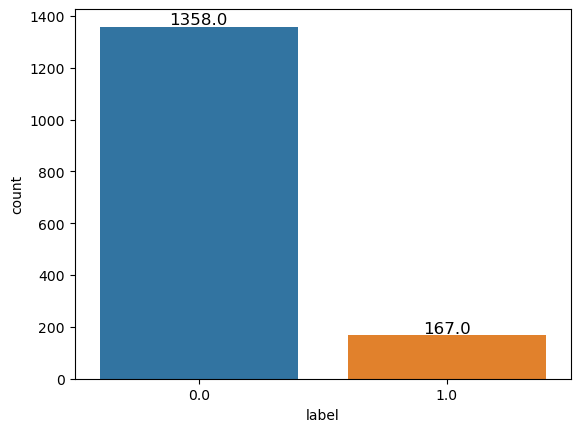

In [296]:
ax=sns.countplot(data=data1, x='label')
# Add labels inside the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

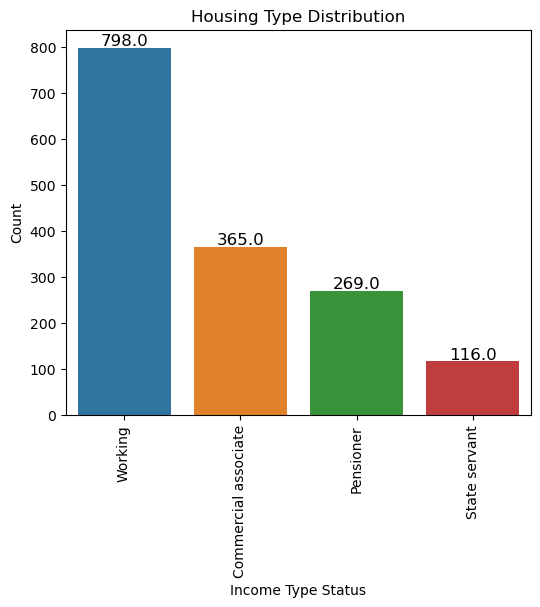

In [307]:
plt.figure(figsize=(6, 5))
ax=sns.barplot(x=data.Type_Income.value_counts().index,y=data.Type_Income.value_counts().values)
plt.xlabel('Income Type Status')
plt.ylabel('Count')
plt.title('Housing Type Distribution')
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

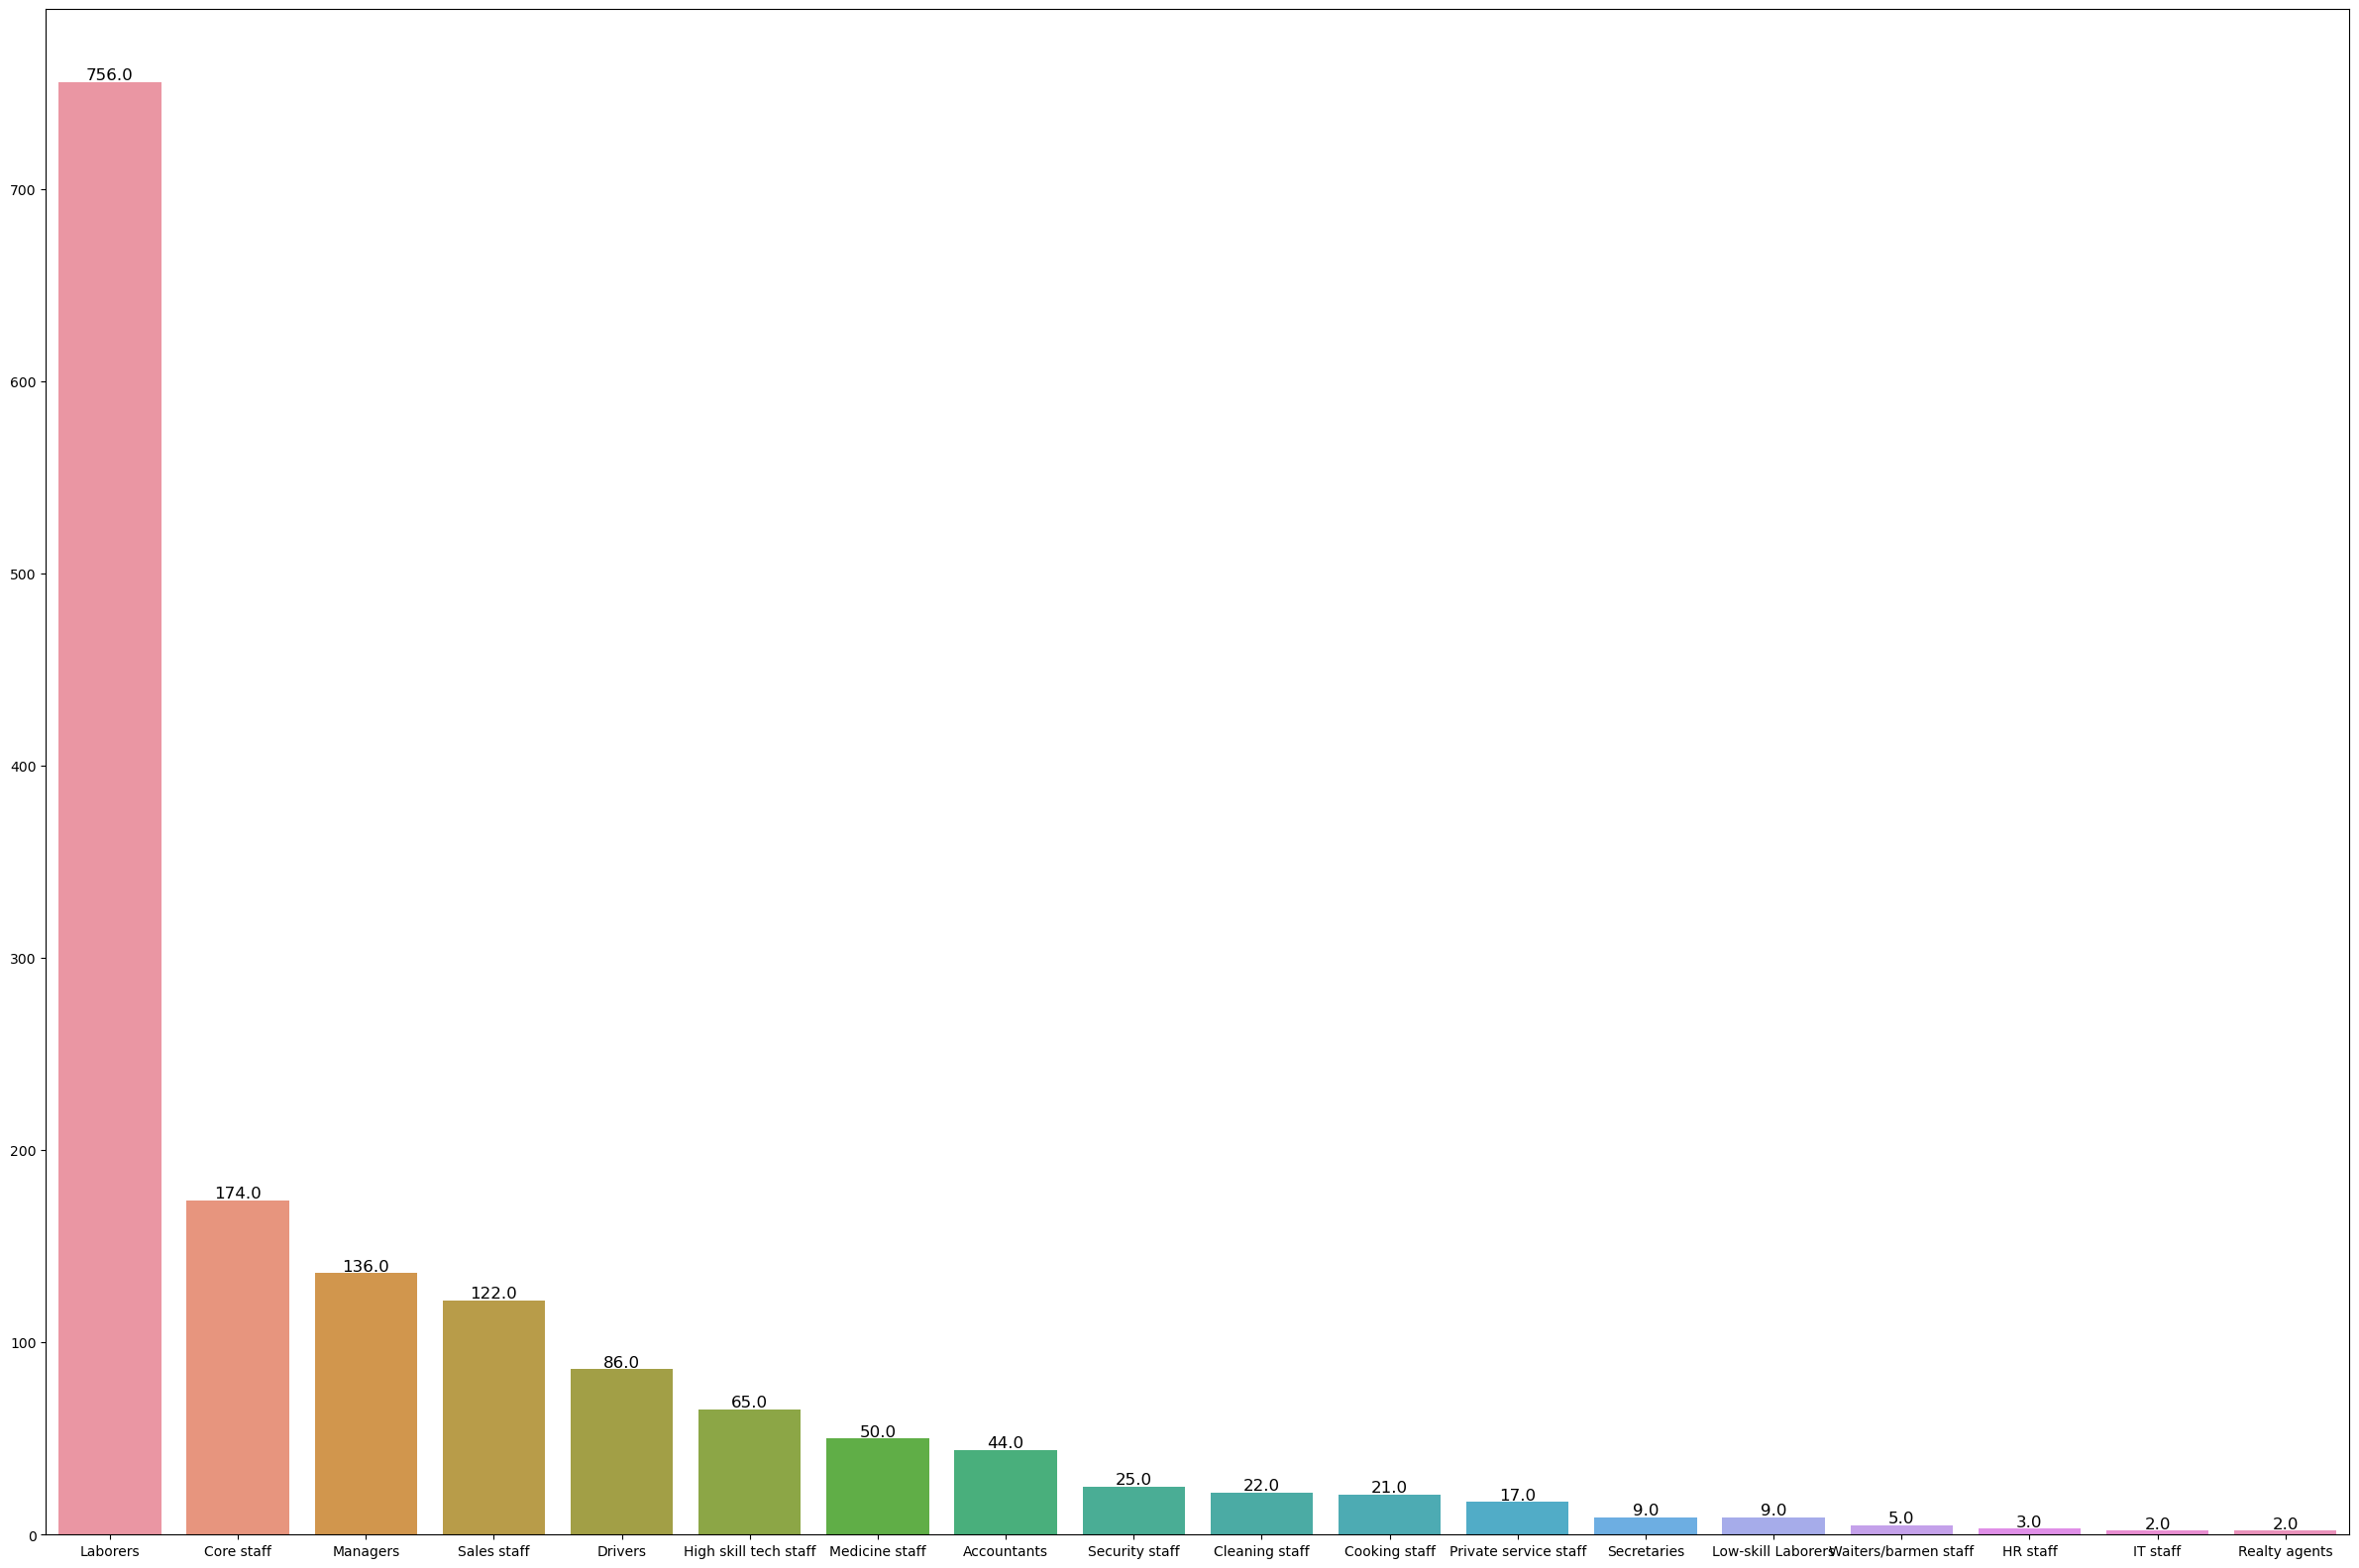

In [328]:
plt.figure(figsize=(30,20))
ax=sns.barplot(x=df.Type_Occupation.value_counts().index,y=df.Type_Occupation.value_counts().values)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

In [358]:
num_cols=[]
for i in data.columns:
    if data[i].dtype!='O':
        num_cols.append(i)
num_cols

['Ind_ID',
 'CHILDREN',
 'Annual_income',
 'Birthday_count',
 'Employed_days',
 'Mobile_phone',
 'Work_Phone',
 'Phone',
 'EMAIL_ID',
 'Family_Members',
 'label']

In [366]:
def drawBoxPlot(df,rows,cols):
    count=0
    indx = df.describe().columns.tolist()
    lenn = len(df.describe().columns.tolist())
    iter = int(len(df.describe().columns.tolist()))/cols if len(df.describe().columns.tolist())%cols==0 else (int(len(df.describe().columns.tolist())/cols))+1
    fig, ax = plt.subplots(rows, cols, figsize=(20, 5))
    fig.tight_layout(pad=2.0)
    for i in range(rows):
        for j in range(cols):
              sns.boxplot(data=df[[indx[count]]],ax=ax[i,j],orient="h")
              ax[i,j].set_title(indx[count])
              ax[i,j].set(yticks=[0])
              count+=1
              if count == lenn:
                    break

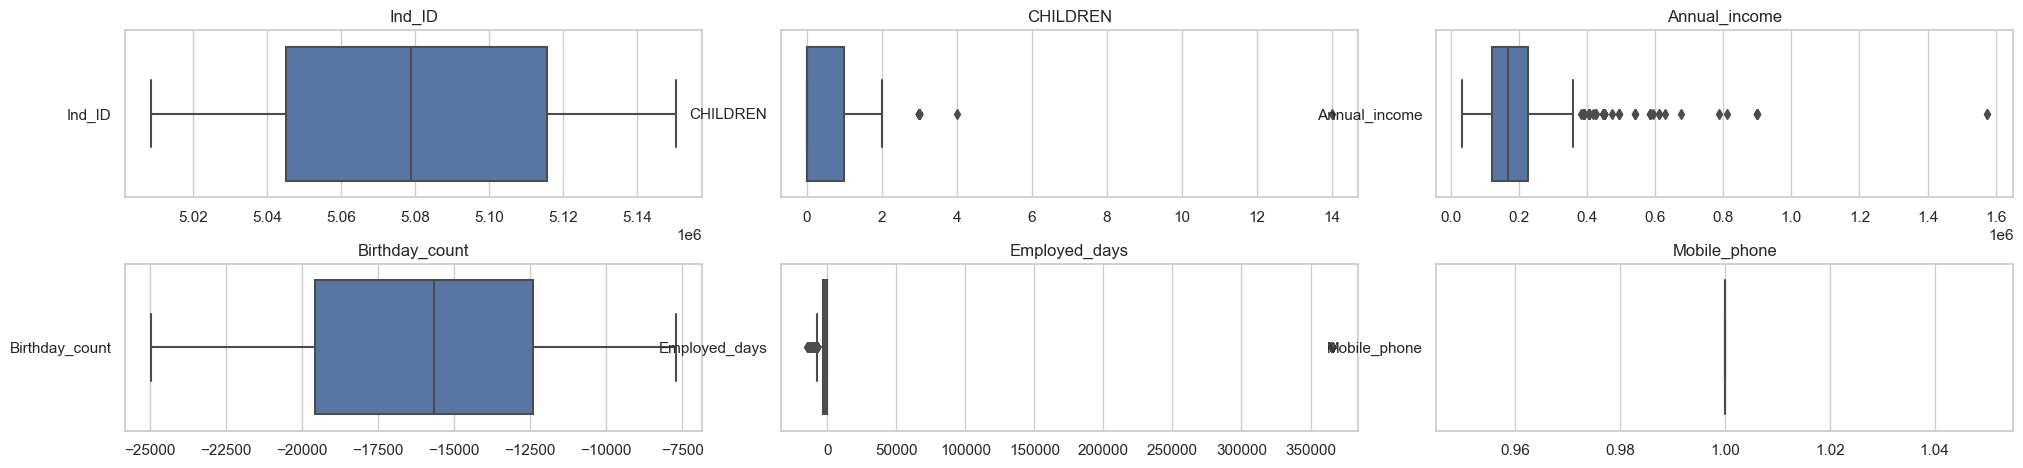

In [369]:
drawBoxPlot(data,2,3)

In [368]:
# there have an Outlieres in Emloyed Days,AbbualINcome and BirthdayCount

<Axes: >

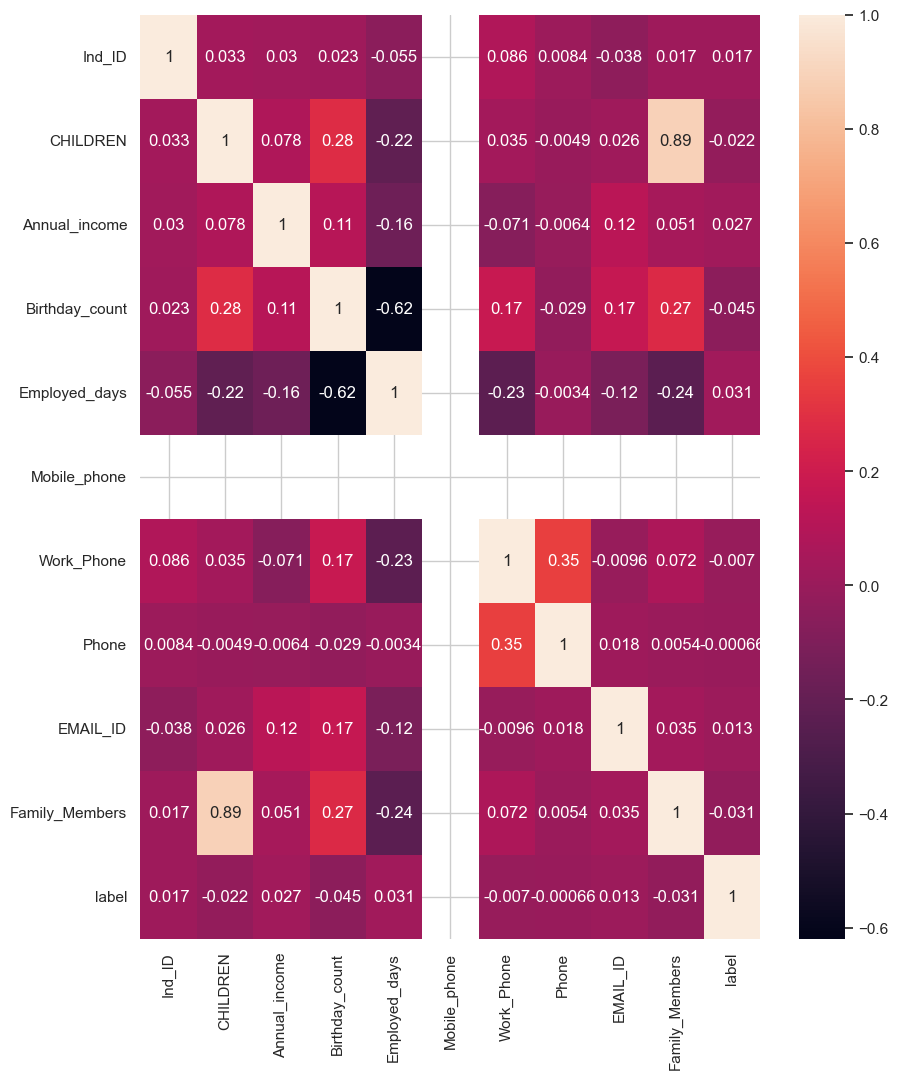

In [373]:
plt.figure(figsize=(10,12))
sns.heatmap(data.corr(),annot=True)

In [377]:
#because value of all column is 1 there is no variation

In [418]:
from imblearn.over_sampling import RandomOverSampler

def preprocessing_data(df,engineering_LogTransform = False):
 
    # Filling Na Values with mod
    nan_columns_mod = ["GENDER","Type_Occupation"]
    for i in nan_columns_mod:
        mode_col = df[i].mode()[0]
        df[i].fillna(mode_col, inplace=True)
        
    # Filling Na Values with mean
    nan_columns_mean = ["Annual_income","Birthday_count"]
    for i in nan_columns_mean:
        mean_col = df[i].mean()
        df[i].fillna(mean_col, inplace=True)
        
    # Outlier Detection      
    numeric_columns = ["Annual_income", "Birthday_count", "Employed_days"]
    for col in numeric_columns:
        mean_ = df[col].mean()
        std_ = df[col].std()
        threshold_ = 1.96

        df = df[(df[col] >= (mean_ - threshold_ * std_)) &
                (df[col] <= (mean_ + threshold_ * std_))]
    display(df)
        
    # Data Binary Encoding✅
    binary_columns = ["GENDER","Car_Owner","Propert_Owner"]

    for col in binary_columns:
        if not "GENDER" == col:
            df[col] = df[col].replace({"Y":1,"N":0})
        else: 
            df[col] = df[col].replace({"M":1,"F":0})
            

    # One-Hot Encoding
    for column in ['Type_Income', 'Type_Occupation', 'Housing_type', 'Marital_status', 'EDUCATION']:
        dummies = pd.get_dummies(df[column], prefix=column)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1).reset_index(drop=True)
    
    # Birthday / Unemployed transform
    df["Age"] = df["Birthday_count"].apply(lambda x : abs(int(x))/365)
    df = df.drop("Birthday_count", axis=1)
    df= df.drop("Ind_ID", axis=1)
    
    # Train-test split ✅  
    X = df.drop("label",axis=1)
    y = df["label"]
    
    display(df)
    
    X_over,y_over=RandomOverSampler().fit_resample(X,y) #Oversampling

    X_train, X_test, y_train, y_test = train_test_split(X_over, y_over,stratify=y_over, random_state=3)
    
    # we can standard scalar or 
    if engineering_LogTransform:
        
        X_train["Employed_days"] = np.log(X_train["Employed_days"].abs())
        X_test["Employed_days"] = np.log(X_test["Employed_days"].abs())
        
        X_train['Annual_income'] = X_train['Annual_income'].apply(lambda x: x ** 0.5)
        X_test['Annual_income'] = X_test['Annual_income'].apply(lambda x: x ** 0.5)

        
    else:
        scaler = StandardScaler()
        
        features = ['Employed_days', 'Annual_income']
        X_train[features] = scaler.fit_transform(X_train[features])
        X_test[features] = scaler.transform(X_test[features])
        
 
    return X_train, X_test, y_train, y_test


In [419]:
X_train, X_test, y_train, y_test = preprocessing_data(df,engineering_LogTransform = True)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
1,5009744,F,Y,N,0,315000.00,Commercial associate,Higher education,Married,House / apartment,-13557.00,-586,1,1,1,0,Laborers,2,1
2,5009746,F,Y,N,0,315000.00,Commercial associate,Higher education,Married,House / apartment,-16040.34,-586,1,1,1,0,Laborers,2,1
3,5009749,F,Y,N,0,191399.33,Commercial associate,Higher education,Married,House / apartment,-13557.00,-586,1,1,1,0,Laborers,2,1
4,5009752,F,Y,N,0,315000.00,Commercial associate,Higher education,Married,House / apartment,-13557.00,-586,1,1,1,0,Laborers,2,1
5,5009753,F,Y,N,0,315000.00,Pensioner,Higher education,Married,House / apartment,-13557.00,-586,1,1,1,0,Laborers,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,191399.33,Commercial associate,Higher education,Married,House / apartment,-11957.00,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.00,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.00,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.00,Working,Higher education,Married,House / apartment,-13174.00,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.00,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.00,-645,1,1,1,0,Drivers,2,0


,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,...,Marital_status_Married,Marital_status_Separated,Marital_status_Single / not married,Marital_status_Widow,EDUCATION_Academic degree,EDUCATION_Higher education,EDUCATION_Incomplete higher,EDUCATION_Lower secondary,EDUCATION_Secondary / secondary special,Age
0,0,1,0,0,315000.00,-586,1,1,1,0,...,1,0,0,0,0,1,0,0,0,37.14
1,0,1,0,0,315000.00,-586,1,1,1,0,...,1,0,0,0,0,1,0,0,0,43.95
2,0,1,0,0,191399.33,-586,1,1,1,0,...,1,0,0,0,0,1,0,0,0,37.14
3,0,1,0,0,315000.00,-586,1,1,1,0,...,1,0,0,0,0,1,0,0,0,37.14
4,0,1,0,0,315000.00,-586,1,1,1,0,...,1,0,0,0,0,1,0,0,0,37.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,0,0,1,0,191399.33,-2182,1,0,0,0,...,1,0,0,0,0,1,0,0,0,32.76
1230,0,0,0,0,225000.00,-1209,1,0,0,0,...,0,0,1,0,0,0,1,0,0,28.02
1231,1,1,1,2,180000.00,-2477,1,0,0,0,...,1,0,0,0,0,1,0,0,0,36.09
1232,1,1,0,0,270000.00,-645,1,1,1,0,...,0,0,0,0,0,0,0,0,1,41.90


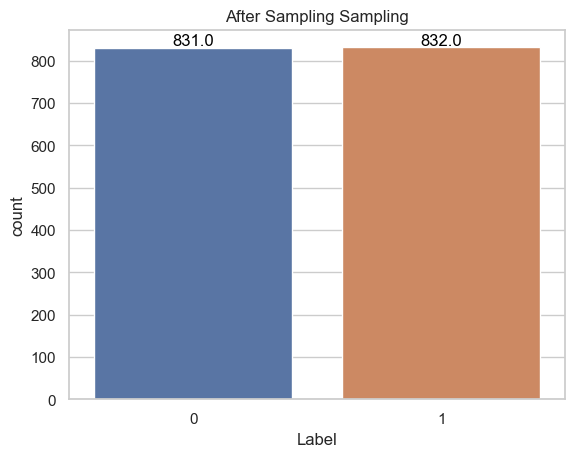

In [420]:
ax=sns.barplot(x=y_train.value_counts().index,y=y_train.value_counts().values)
plt.xlabel('Label')
plt.ylabel('count')
plt.title('After Sampling Sampling')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

In [421]:
clf = LazyClassifier(verbose=0,
                     ignore_warnings=True,
                     custom_metric=None,
                     predictions=False,
                     random_state=3,
                     classifiers='all')

models, predictions = clf.fit(X_train , X_test , y_train , y_test)


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:03<00:00,  7.65it/s]

[LightGBM] [Info] Number of positive: 832, number of negative: 831
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001349 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 682
[LightGBM] [Info] Number of data points in the train set: 1663, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500301 -> initscore=0.001203
[LightGBM] [Info] Start training from score 0.001203


In [422]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
ExtraTreesClassifier,0.99,0.99,0.99,0.99,0.42
RandomForestClassifier,0.99,0.99,0.99,0.99,0.46
BaggingClassifier,0.98,0.98,0.98,0.98,0.16
XGBClassifier,0.97,0.97,0.97,0.97,0.14
LGBMClassifier,0.97,0.97,0.97,0.97,0.14
LabelPropagation,0.97,0.97,0.97,0.97,0.28
LabelSpreading,0.97,0.97,0.97,0.97,0.31
ExtraTreeClassifier,0.95,0.95,0.95,0.95,0.03
DecisionTreeClassifier,0.93,0.93,0.93,0.93,0.04


In [423]:
data['Mobile_phone'].value_counts()

1    1548
Name: Mobile_phone, dtype: int64

In [424]:
from sklearn.model_selection import StratifiedKFold

In [425]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [426]:
from sklearn.metrics import f1_score, accuracy_score,confusion_matrix,classification_report,roc_auc_score, RocCurveDisplay

In [427]:
rf_classifier = RandomForestClassifier()

param_grid = {
    'n_estimators': [100],
    'max_depth': [None, 4],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1,5],
    'max_features': ['auto', 'sqrt', 'log2']
}

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=3)

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=kf, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_estimator = grid_search.best_estimator_

In [428]:
# Print or access attributes of the best estimator
print("Best Estimator:", best_estimator)

# You can also access specific attributes, for example:
print("Best Max Depth:", best_estimator.max_depth)
print("Best Number of Estimators:", best_estimator.n_estimators)

Best Estimator: RandomForestClassifier(max_features='log2')
Best Max Depth: None
Best Number of Estimators: 100


In [429]:
y_pred = best_estimator.predict(X_test)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       278
           1       0.98      1.00      0.99       277

    accuracy                           0.99       555
   macro avg       0.99      0.99      0.99       555
weighted avg       0.99      0.99      0.99       555

Best Estimator: RandomForestClassifier(max_features='log2')
Best Params: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best F1 Score: 0.9934326117104708
Test F1 Score: 0.9910554561717353


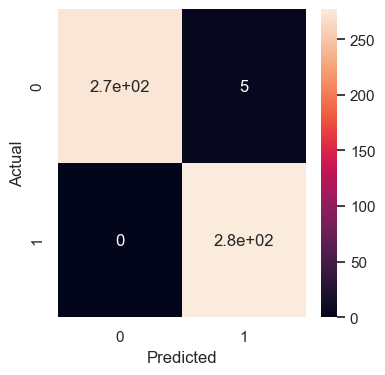

In [430]:
confusion=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(4,4))
sns.heatmap(confusion,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

print(classification_report(y_test,y_pred))
print("Best Estimator:", grid_search.best_estimator_)
print("Best Params:", grid_search.best_params_)
print("Best F1 Score:", grid_search.best_score_)
print("Test F1 Score:", f1_score(y_test, y_pred))

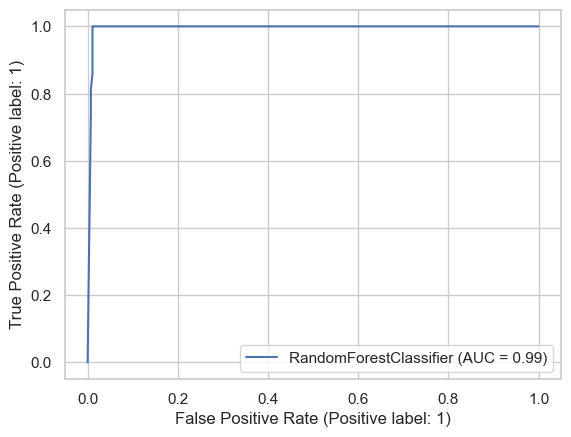

In [431]:
RocCurveDisplay.from_estimator(best_estimator, X_test, y_test)

In [432]:
explainer = shap.TreeExplainer(best_estimator)
shap_values = explainer.shap_values(X_test)

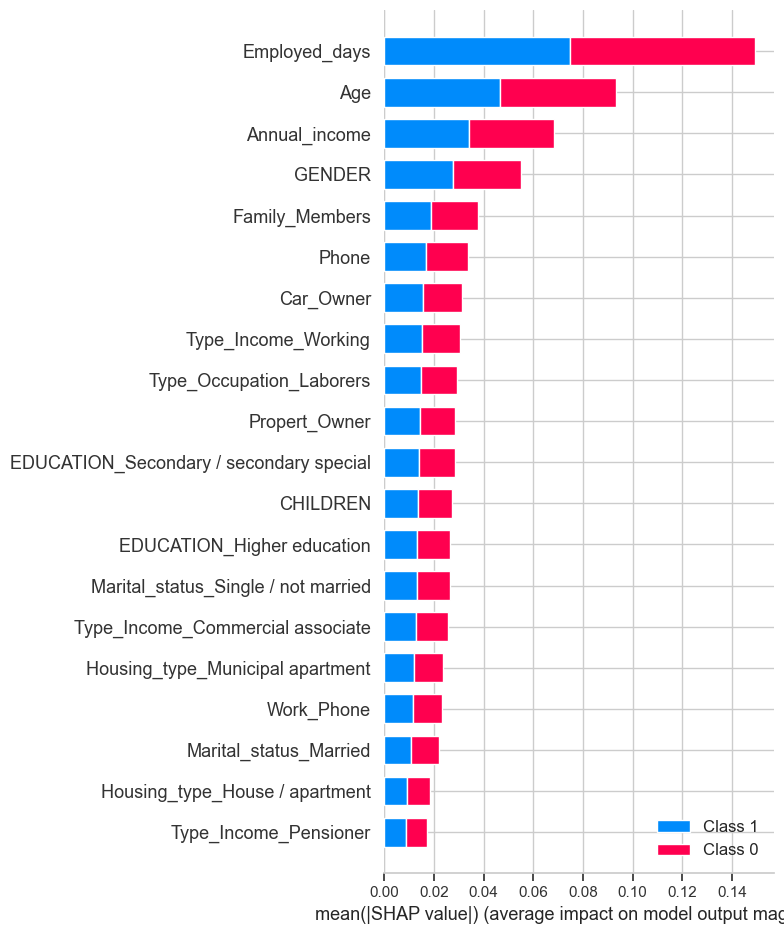

In [433]:
# Create a summary plot
shap.summary_plot(shap_values, X_test)

In [434]:
import pickle

In [435]:
with open("Credictcard.pkl","wb") as file:
    pickle.dump(best_estimator,file)

In [436]:
with open("Credictcard.pkl","rb") as file:
    pk1=pickle.load(file)

In [437]:
X_test.columns

Index(['GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN', 'Annual_income',
       'Employed_days', 'Mobile_phone', 'Work_Phone', 'Phone', 'EMAIL_ID',
       'Family_Members', 'Type_Income_Commercial associate',
       'Type_Income_Pensioner', 'Type_Income_State servant',
       'Type_Income_Working', 'Type_Occupation_Accountants',
       'Type_Occupation_Cleaning staff', 'Type_Occupation_Cooking staff',
       'Type_Occupation_Core staff', 'Type_Occupation_Drivers',
       'Type_Occupation_HR staff', 'Type_Occupation_High skill tech staff',
       'Type_Occupation_IT staff', 'Type_Occupation_Laborers',
       'Type_Occupation_Low-skill Laborers', 'Type_Occupation_Managers',
       'Type_Occupation_Medicine staff',
       'Type_Occupation_Private service staff',
       'Type_Occupation_Realty agents', 'Type_Occupation_Sales staff',
       'Type_Occupation_Secretaries', 'Type_Occupation_Security staff',
       'Type_Occupation_Waiters/barmen staff', 'Housing_type_Co-op apartment',
     

In [438]:
X_test.shape

(555, 50)

In [439]:
from PIL import Image

In [440]:
image = Image.open('Shap plot.png')